# Unsupervised Learning - Clustering Analysis of CPQ File

Attached are two data sets:

1)     QuoteData Spreadsheet (CRM data) outlining the quotes and quote lines with products being configured

2)     Engine Logs for Eloquence (10 application logs file).

 

The candidate can use any tool of his/her choice or liking on their own laptop or ours and mine/profile the data and present insights on the data for both CPQ and Eloquence (both are proprietary software products) Specific areas could be:

1)     the type of Components Used, Processing Time, Documents Processed, Type of File, etc. for the Eloquence data and

2)     product and pricing on quote and quote lines; pricing related to account, contact, product for the CPQ related Quote Data

 

In summary, we want the candidate to look at the two different sets of data and provide us with meaningful data insights and whatever other useful information that we could glean from the data. Though some may view the attached case study as preparation for a data reporting role, it is not. This case study is just one of the small tools (data analysis 101) that we utilize in determining the right candidate for the role. This is, in fact, a true data analyst/scientist role and will encompass a mix of strategy, advisory and implementation (though there will be business intelligence and analytics reporting for all cloud products as part of the job profile as well).


Since the business mentions profiling, this seems to be a Clustering Analysis based on Unsupervised Learning Problem, and as there is no Target Variable present, this reinforces the Clustering Analysis Approach.

1) Data dictionary not provided?

2) The clusters will be formed based on the variables given in the business problem. ex.: Components Used from the Eloquence log file

3) Data Standardization: convert prices of the products into percentages, so as to compare different products based on percent price.

4) Scree plot: x= centers (centroids) y= WCSS (Within Cluster Sum of Square); then identify the bend or curve in Scree Plot

5) Dimensionality Reduction PCA & LCA 



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Run multiple commands and get multiple outputs within a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### TWO datasets: Quotes & Quote Lines
use pandas to import CSV 

In [4]:
# import Quote data
qt1 = pd.read_csv('QuoteDataStd-Norm.csv')
qt1.head()

,Id,AccountId,BillingCity,BillingContactName,BillingCountry,BillingFax,BillingLine1,BillingLine2,BillingLine3,BillingName,...,AccountGroupCode,DueDate,MarketClassificationCode,ApprovedDateTime,SubmittedDateTime,TaxPercentage,TotalWeight,WeightUomCode,TotalLineItemBaseAmount,ReviewDate
0,9F43A459-CEC2-4CE9-9F09-00CC1F66A2F0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.00,NaN
1,8356DB7D-B0F8-4938-A473-036F79F725AB,FCF18B79-EA87-49A0-BA08-F089390AA11F,Cincinnati,NaN,USA,NaN,55 Merchant St,Suite 100,NaN,NaN,...,NaN,NaN,NaN,NaN,22:20.0,NaN,0.0,1.0,220.00,20:57.4
2,34098BEA-37CF-41B8-A6BE-05A3F2909C02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.00,NaN
3,41BEA93E-BF13-405D-8A96-05DD3EA746B8,AF7164B1-D530-4662-9A0D-2799B55A94BE,San Diege,NaN,USA,NaN,777 Catalina Rd.,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,52218.96,31:01.5
4,5AD370F9-7A64-481A-A2B7-06C4C1862735,1C146B1A-D03D-4D47-9FE9-DEA8A1627A22,Detroit,NaN,NaN,NaN,555 Woodward Ave,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60.0,1.0,45545.18,NaN


In [28]:
qt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 91 columns):
Id                              155 non-null object
AccountId                       47 non-null object
BillingCity                     47 non-null object
BillingContactName              0 non-null float64
BillingCountry                  28 non-null object
BillingFax                      0 non-null float64
BillingLine1                    53 non-null object
BillingLine2                    13 non-null object
BillingLine3                    0 non-null float64
BillingName                     6 non-null object
BillingPostalCode               49 non-null object
BillingStateOrProvince          47 non-null object
BillingTelephone                38 non-null object
CampaignId                      0 non-null float64
ContactId                       31 non-null object
Description                     8 non-null object
DiscountAmount                  0 non-null float64
DiscountPercentage           

In [5]:
# import Quote Line data
ql1 = pd.read_csv('QuoteLineData.csv')
ql1.head()

,Id,BaseAmount,Description,ExtendedAmount,IsPriceOverridden,IsProductOverridden,LineItemNumber,ManualDiscountAmount,OwnerId,PriceListId,...,ManualDiscountPercentage,QuantityPerUnit,TaxPercentage,UnitWeight,CustomerBaseAmount,CustomerUnitPrice,DealerProfitAmount,DealerMargin,MfgMargin,MfgPrice
0,ADF454DB-F82F-4502-ADE9-06454552F2BF,37.99,"Synthetic palm, flexible knuckles, breathable ...",37.99,NaN,NaN,1,NaN,NaN,E239ED5B-1CD1-4324-8118-829F7D68FF13,...,NaN,NaN,NaN,NaN,37.99,37.99,NaN,0.00,45.01,NaN
1,BDDB5B1A-211D-4192-A086-06D388767EDE,239808.84,Sabre-X,215827.96,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,60.0,239808.84,39968.14,NaN,-11.11,96.50,0.0
2,8ABD68FE-16C6-4C6A-813C-087EB75CD364,98688.00,My Description,93753.60,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98688.00,98688.00,NaN,-5.26,100.00,NaN
3,95FA58C7-34B1-4DD3-9210-08FA0779E16C,NaN,Heavy Duty Industrial Dampers,NaN,NaN,NaN,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,063226B2-0EA6-4D93-9667-0AAF3911CD97,48086.58,Sabre-X,42316.19,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,60.0,48086.58,48086.58,NaN,-13.64,97.30,0.0


In [29]:
ql1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 84 columns):
Id                           230 non-null object
BaseAmount                   168 non-null float64
Description                  218 non-null object
ExtendedAmount               168 non-null float64
IsPriceOverridden            7 non-null float64
IsProductOverridden          0 non-null float64
LineItemNumber               230 non-null int64
ManualDiscountAmount         5 non-null float64
OwnerId                      0 non-null float64
PriceListId                  35 non-null object
ProductId                    208 non-null object
Quantity                     230 non-null int64
QuoteId                      230 non-null object
RequestedDeliveryDate        0 non-null float64
RequestedShipDate            0 non-null float64
ShippingCity                 0 non-null float64
ShippingContactName          0 non-null float64
ShippingCountry              0 non-null float64
ShippingFax            

In [75]:
qlSel = ql1[['UnitPrice', 'ListPrice', 'CustomerUnitPrice', 'Quantity']]
qlSel.head()

,UnitPrice,ListPrice,CustomerUnitPrice,Quantity
0,37.99,37.99,37.99,1
1,39968.14,39968.14,39968.14,6
2,98688.00,98688.00,98688.00,1
3,NaN,NaN,NaN,1
4,48086.58,48086.58,48086.58,1


In [77]:
qlSel = qlSel.fillna(0)
qlSel.head()

,UnitPrice,ListPrice,CustomerUnitPrice,Quantity
0,37.99,37.99,37.99,1
1,39968.14,39968.14,39968.14,6
2,98688.00,98688.00,98688.00,1
3,0.00,0.00,0.00,1
4,48086.58,48086.58,48086.58,1


In [81]:
X = qlSel.iloc[:, [0,1,2,3]].values
y = qlSel.iloc[:,3].values

In [74]:
X
y

array([[1.00000000e+00, 3.79900000e+01, 3.79900000e+01, 3.79900000e+01],
       [6.00000000e+00, 3.99681400e+04, 3.99681400e+04, 3.99681400e+04],
       [1.00000000e+00, 9.86880000e+04, 9.86880000e+04, 9.86880000e+04],
       [1.00000000e+00,            nan,            nan,            nan],
       [1.00000000e+00, 4.80865800e+04, 4.80865800e+04, 4.80865800e+04],
       [1.00000000e+00,            nan,            nan,            nan],
       [1.00000000e+00, 5.09862300e+04, 5.09862300e+04, 5.09862300e+04],
       [1.00000000e+00,            nan,            nan,            nan],
       [1.00000000e+00, 1.24764000e+05, 1.24764000e+05, 1.24764000e+05],
       [1.00000000e+00,            nan,            nan,            nan],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.50000000e+02, 3.50000000e+02, 3.50000000e+02],
       [1.00000000e+03, 3.50000000e+02, 3.50000000e+02, 3.50000000e+02],
       [1.00000000e+00, 2.20000000e+02, 2.20000000e

array([   1,    6,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1, 1000,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,  100,   30,    1,    1,    1,
          1,    1,    1,    1,    1,    6,    1,    1,    1,    1,    1,
          1,    1,    1,   20,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    5,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
         10,    1,    1,    1,   20,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,   

# Building Model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Text(0.5,1,'The Elbow Method')

Text(0.5,0,'Number of clusters')

Text(0,0.5,'WCSS')

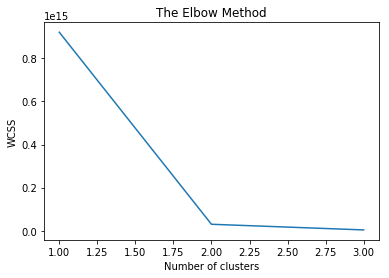

In [95]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []  # create an emptpy list which can take upto 10 elements (WCSS Within Cluster Sum of Square)
for i in range(1, 4): # create a range
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 5, random_state = 123) # create the model
    kmeans.fit(X) # fit the model
    wcss.append(kmeans.inertia_)# append the range to the 
plt.plot(range(1, 4), wcss) # plot the X cordinator (range) and y cordinator (WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
# Create the model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)

In [97]:
# Fitting K-Means to the dataset
y_kmeans = kmeans.fit_predict(X)

In [98]:
# Read the predicted cluster
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0])

Text(0.5,1,'Clusters')

Text(0.5,0,'Price')

Text(0,0.5,'Product Quantity')

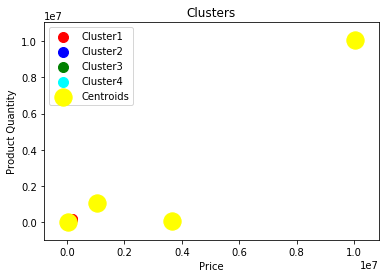

In [99]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Price')
plt.ylabel('Product Quantity')
plt.legend()
plt.show()